# CRIME IN VANCOUVER - ANALYSIS REPORT


At some point in our lives, we have visited or lived in Vancouver; if you are indeed a Vancouverite. But, how secure is your neighbourhood? Are you aware about the common types of crimes around you and how frequent they occur?

By the end of this report, you will have a better understanding of the most dangerous neighbourhoods in Vancouver, using data collected in the past 10 years. 


In [34]:
Image(url= "http://www.metronews.ca/content/dam/thestar/2014/10/17/oppenheimer27.jpg.size.xxlarge.letterbox.jpg")

## OBJECTIVE

This report will highlight how the data was retrieved, cleaned up, analysed and visualized using python, pandas and anacondas.

## PART I: OBTAINING THE DATA

In [277]:
import pandas as pd
import numpy as np

#Visualization imports can be seen below
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20.0)

import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib


In [254]:
# the data will be imported from my computer and assigned to the variable 'df'
df = pd.DataFrame.from_csv('c:/Users/sabby/Desktop/Data Science/crime.csv') 

In [255]:
# let's see the columns included in our data set
df.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

## PART II: SCRUBBING THE DATA

In [256]:
# Let's check for null values
df.isnull().any()

TYPE             False
YEAR             False
MONTH            False
DAY              False
HOUR              True
MINUTE            True
HUNDRED_BLOCK     True
NEIGHBOURHOOD     True
X                False
Y                False
Latitude         False
Longitude        False
dtype: bool



There are some missing data, the data is missing because City of Vancouver is protecting the privacy of these events. 

Let's get a quick overview of how many missing values we have.

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530652 entries, 0 to 530651
Data columns (total 12 columns):
TYPE             530652 non-null object
YEAR             530652 non-null int64
MONTH            530652 non-null int64
DAY              530652 non-null int64
HOUR             476290 non-null float64
MINUTE           476290 non-null float64
HUNDRED_BLOCK    530639 non-null object
NEIGHBOURHOOD    474028 non-null object
X                530652 non-null float64
Y                530652 non-null float64
Latitude         530652 non-null float64
Longitude        530652 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 72.6+ MB


##### Let's see what our data set looks like

In [279]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


# Renaming the Headings 
Let's rename some columns for a better understanding of our data set.

In [ ]:
df=df.rename(columns={'HUNDRED_BLOCK':'STREET','X': 'X - AXIS', 'Y':'Y - AXIS', 'Latitude':'LATITUDE','Longitude':'LONGITUDE'})
df

# Concatenating the date
This helps to give a better representation of the events. 

Setting the day of the week: dt.dayofweek (Monday=0 to Sunday=6) and add it as a column called 'DAY_OF_WEEK'

In [91]:
df['DATE'] = pd.to_datetime({'year':df['YEAR'], 'month':df['MONTH'], 'day':df['DAY']})
df['DAY OF WEEK'] = df['DATE'].dt.dayofweek
df.index = (df['DATE'])


df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,STREET,NEIGHBOURHOOD,X - AXIS,Y - AXIS,LATITUDE,LONGITUDE,DATE,DAY OF WEEK
DATE,,,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-12,0
2003-05-07,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-05-07,2
2003-04-23,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-23,2
2003-04-20,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-20,6
2003-04-12,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2003-04-12,5


## PART III : EXPLORING THE DATA 


In [6]:
#let's see the number of rows and columns of the data set
df.shape

(530652, 11)

In [280]:
#check the data type of our data set
df.dtypes

TYPE              object
YEAR               int64
MONTH              int64
DAY                int64
HOUR             float64
MINUTE           float64
HUNDRED_BLOCK     object
NEIGHBOURHOOD     object
X                float64
Y                float64
Latitude         float64
Longitude        float64
dtype: object

# What are the most common Crimes in Vancouver ?

In [295]:
from IPython.display import Image
Image(url= "http://www.clair-hills.ca/wp-content/uploads/2016/04/car-theft-prevention.jpg")

In [283]:
#Let's analyse the types of crimes we have and sort it by the most common crime
crimes = df['TYPE'].value_counts()
crimes.sort_values()

Homicide                                                     220
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Vehicle Collision or Pedestrian Struck (with Injury)       21901
Theft of Bicycle                                           25730
Break and Enter Commercial                                 33845
Theft of Vehicle                                           38418
Other Theft                                                52167
Offence Against a Person                                   54142
Break and Enter Residential/Other                          60862
Mischief                                                   70413
Theft from Vehicle                                        172700
Name: TYPE, dtype: int64

# What's the most dangeroous Neighbourhood in Vancouver ?

In [297]:
from IPython.display import Image
Image(url= "http://photos.wikimapia.org/p/00/01/86/29/70_big.jpg")

In [296]:
location = df['NEIGHBOURHOOD'].value_counts()
location.sort_values()

Musqueam                        532
Stanley Park                   3775
South Cambie                   5212
Shaughnessy                    5426
West Point Grey                5871
Arbutus Ridge                  6066
Kerrisdale                     7447
Dunbar-Southlands              7746
Oakridge                       8037
Killarney                     10475
Victoria-Fraserview           10819
Riley Park                    12521
Marpole                       13083
Sunset                        17396
Hastings-Sunrise              18126
Strathcona                    20919
Kensington-Cedar Cottage      24941
Kitsilano                     26699
Renfrew-Collingwood           26761
Grandview-Woodland            27180
Mount Pleasant                30536
Fairview                      32161
West End                      41352
Central Business District    110947
Name: NEIGHBOURHOOD, dtype: int64

# Statistical overview of the data set

In [152]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,5.306520e+05,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,441802.149909,4.897663e+06,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,149281.547656,1.654633e+06,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489944.452500,5.453651e+06,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491499.240000,5.456840e+06,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493547.210000,5.458638e+06,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


# Correlation

### Negative correaltions can be observed throughout the data set.


,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
YEAR,1.000000,-0.036760,-0.006259,-0.010584,0.061995,-0.021933,-0.021905,-0.021905,0.021960
MONTH,-0.036760,1.000000,0.008962,0.000165,-0.005977,0.000980,0.000841,0.000841,-0.000838
DAY,-0.006259,0.008962,1.000000,0.004865,0.005272,-0.004024,-0.004049,-0.004049,0.004043
HOUR,-0.010584,0.000165,0.004865,1.000000,-0.049010,0.000325,-0.018249,-0.018259,0.000343
MINUTE,0.061995,-0.005977,0.005272,-0.049010,1.000000,0.018892,0.048568,0.048622,0.018827
X,-0.021933,0.000980,-0.004024,0.000325,0.018892,1.000000,0.999843,0.999843,-0.999831
Y,-0.021905,0.000841,-0.004049,-0.018249,0.048568,0.999843,1.000000,1.000000,-0.999999
Latitude,-0.021905,0.000841,-0.004049,-0.018259,0.048622,0.999843,1.000000,1.000000,-0.999999
Longitude,0.021960,-0.000838,0.004043,0.000343,0.018827,-0.999831,-0.999999,-0.999999,1.000000


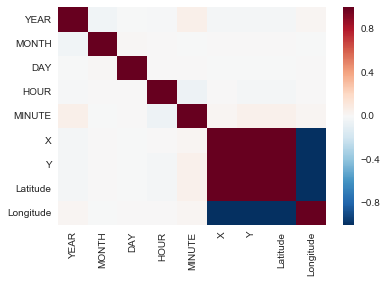

In [151]:
correlation = df.corr()
correlation

sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

correlation

#### I adjusted the data by making the neighbourhoods numeric to get a better correlation but this did not make any significant difference.

MARPOLE - 6
STRATHCONA - 7
KERRISDALE 5
GRANDVIEW WOODLAND - 2
WEST END - 3
CENTRAL BUSINESS DISTRICT - 4
DUNBAR SOUTHLANDS - 8
Sunset - 9
Victoria-Fraserview - 10
Fairview - 11
Kensington-Cedar Cottage - 12
Killarney - 13
Riley Park - 14
Musqueam - 15 
Mount Pleasant - 16
West Point Grey - 17
KITSILANO - 18
STANLEY PARK - 19 
Hastings-Sunrise - 20
Shaughnessy - 21
Oakridge - 22
Renfrew-Collingwood - 23
South Cambie - 24

In [154]:
#let's see the correlation between the type of theft and the location 
df2 = pd.DataFrame.from_csv('c:/Users/sabby/Desktop/Data Science/crime2.csv') 
df2.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,7.0,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,7.0,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,7.0,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,7.0,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,7.0,493906.5,5457452.47,49.269802,-123.083763


,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD,X,Y,Latitude,Longitude
YEAR,1.000000,-0.036760,-0.006259,-0.010584,0.061995,-0.014886,-0.021933,-0.021905,-0.021905,0.021960
MONTH,-0.036760,1.000000,0.008962,0.000165,-0.005977,0.005241,0.000980,0.000841,0.000841,-0.000838
DAY,-0.006259,0.008962,1.000000,0.004865,0.005272,-0.000290,-0.004024,-0.004049,-0.004049,0.004043
HOUR,-0.010584,0.000165,0.004865,1.000000,-0.049010,0.016645,0.000325,-0.018249,-0.018259,0.000343
MINUTE,0.061995,-0.005977,0.005272,-0.049010,1.000000,-0.035563,0.018892,0.048568,0.048622,0.018827
NEIGHBOURHOOD,-0.014886,0.005241,-0.000290,0.016645,-0.035563,1.000000,0.247224,-0.354006,-0.353849,0.247599
X,-0.021933,0.000980,-0.004024,0.000325,0.018892,0.247224,1.000000,0.999843,0.999843,-0.999831
Y,-0.021905,0.000841,-0.004049,-0.018249,0.048568,-0.354006,0.999843,1.000000,1.000000,-0.999999
Latitude,-0.021905,0.000841,-0.004049,-0.018259,0.048622,-0.353849,0.999843,1.000000,1.000000,-0.999999
Longitude,0.021960,-0.000838,0.004043,0.000343,0.018827,0.247599,-0.999831,-0.999999,-0.999999,1.000000


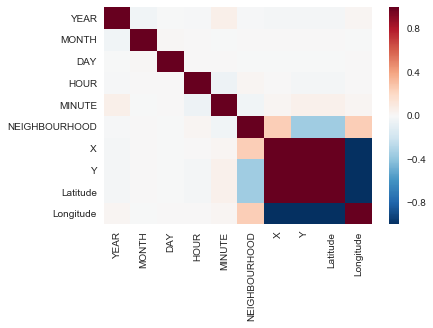

In [155]:
correlation2 = df2.corr()
correlation2

sns.heatmap(correlation2, 
            xticklabels=correlation2.columns.values,
            yticklabels=correlation2.columns.values)

correlation2

# PART IV: DATA VISUALIZATION


#  Have crimes increased or decreased throughout the years ?

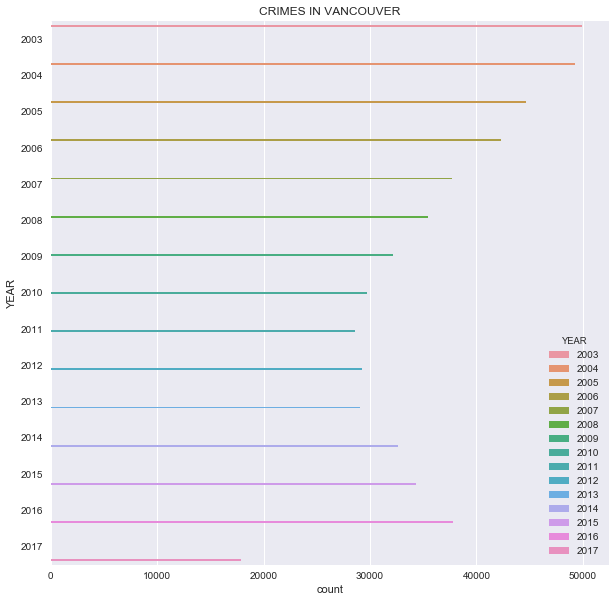

In [330]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="YEAR", hue='YEAR', data=df).set_title('CRIMES IN VANCOUVER');

# What is the most dangerous Neighbourhood?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

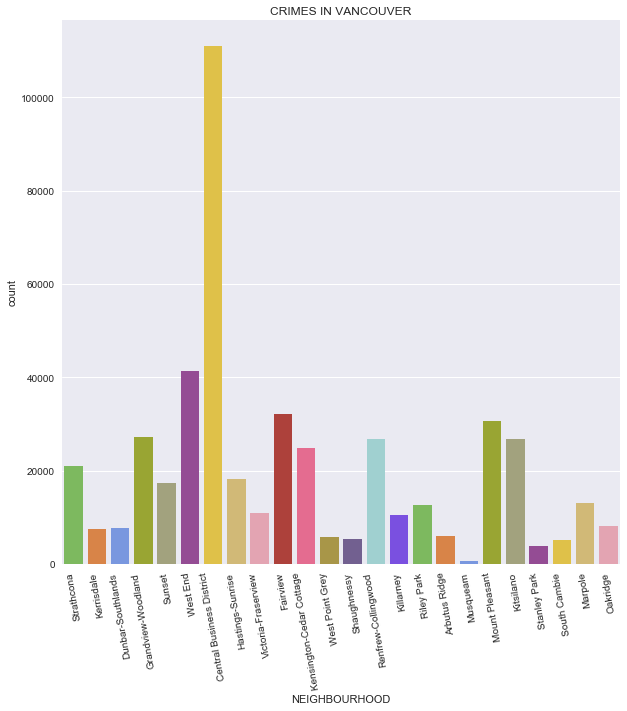

In [331]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
pylab.rcParams['figure.figsize'] = (10, 10.0)

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='NEIGHBOURHOOD', data=df, palette=color_types).set_title('CRIMES IN VANCOUVER');
 
# Rotate x-labels
plt.xticks(rotation=100)




# What is the most common crime in Vancouver ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

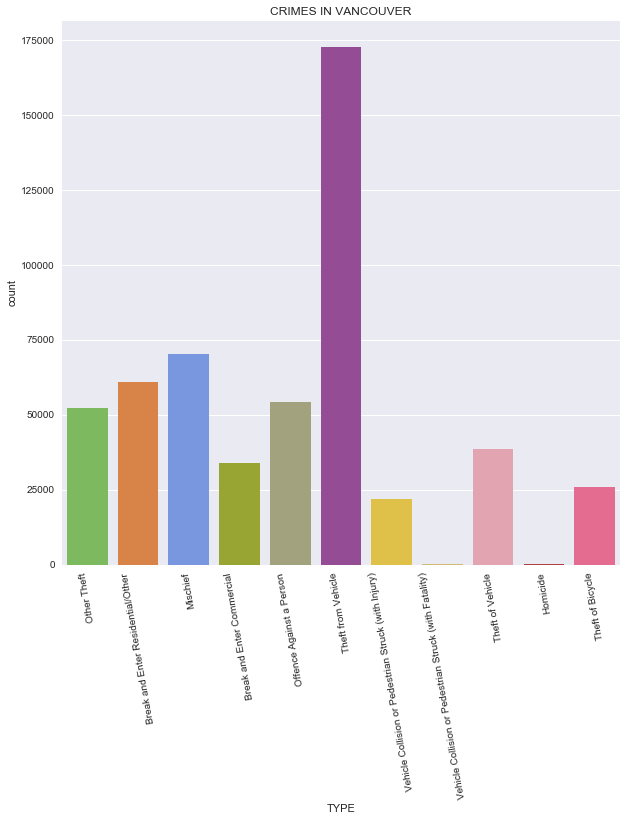

In [332]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
pylab.rcParams['figure.figsize'] = (10, 10.0)

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='TYPE', data=df, palette=color_types).set_title('CRIMES IN VANCOUVER');
 
# Rotate x-labels
plt.xticks(rotation=100)

# Which days of the month experiences the most crimes?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

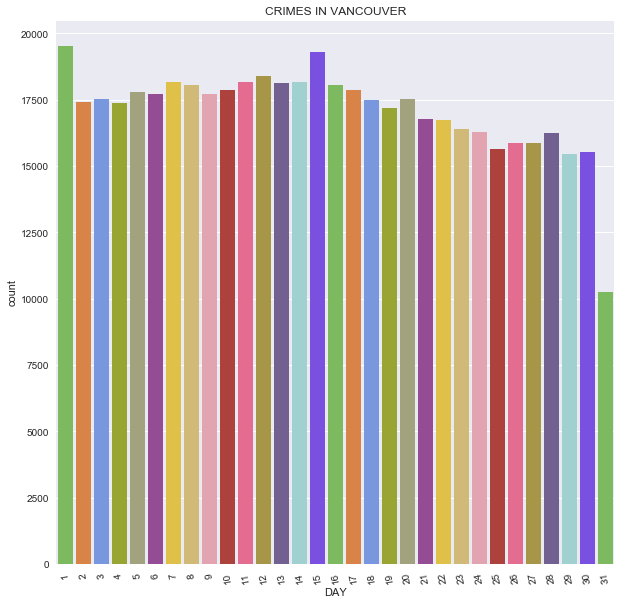

In [333]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']
pylab.rcParams['figure.figsize'] = (10, 10.0)

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='DAY', data=df, palette=color_types).set_title('CRIMES IN VANCOUVER');
 
# Rotate x-labels
plt.xticks(rotation=100)

# Mapping the Latitude and Longitude on a map

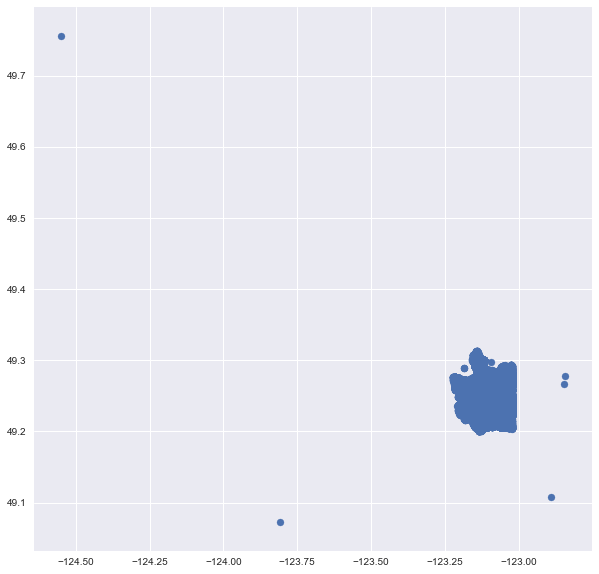

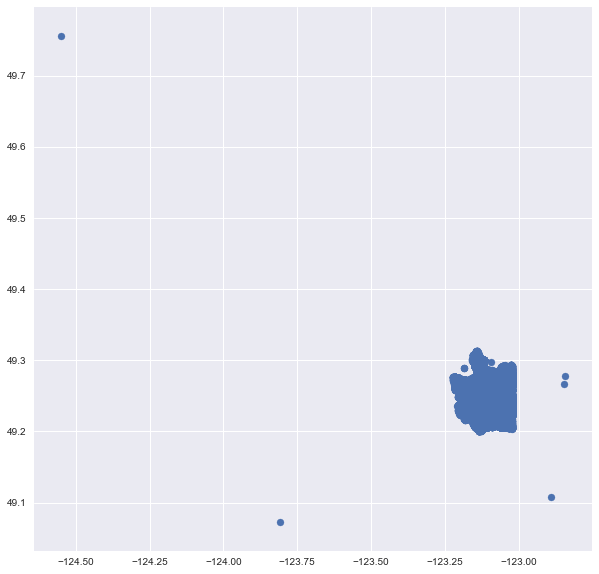

In [326]:
import matplotlib.pyplot as plt
map = pd.DataFrame.from_csv('c:/Users/sabby/Desktop/Data Science/crime.csv')
x = map[map['Longitude'] != 0]['Longitude']
y = map[map['Latitude'] != 0]['Latitude']
pylab.rcParams['figure.figsize'] = (10, 10.0)

fig = plt.figure() 

plt.scatter(x, y)

fig


#map.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4)
#plt.show()
#import matplotlib.pyplot as plt
